In [5]:
# To do 
#scaling . standardization, minMax scaler 
# Normalization 

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('data/heart.csv')

# Display the first few rows of the dataset
# print(data.head().to_string())

# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
y = data['target']

# selector = SelectKBest(chi2, k=10)
# x_new = selector.fit_transform(X, y)
# selected_features = X.columns[selector.get_support()]

# print('Selected Features: ', selected_features)




# Data Splitting
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cross validation - evaluate performance of the data 
model = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print('Cross Validation Accuracy: ', scores.mean())
print(f'Mean cross validation score: {scores.mean():.3f} +/- {scores.std():.3f}')
    


Cross Validation Accuracy:  0.8151366120218579
Mean cross validation score: 0.815 +/- 0.050


In [7]:
# Training and evaluating the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Test Score Accuracy: ', accuracy_score(y_test, y_pred))

Test Score Accuracy:  0.819672131147541


Logistic Regression Accuracy: 0.8032786885245902
Logistic Regression Precision: 0.7692307692307693
Logistic Regression Recall: 0.9090909090909091
Logistic Regression F1: 0.8333333333333333
Logistic Regression ROC AUC: 0.7938311688311689


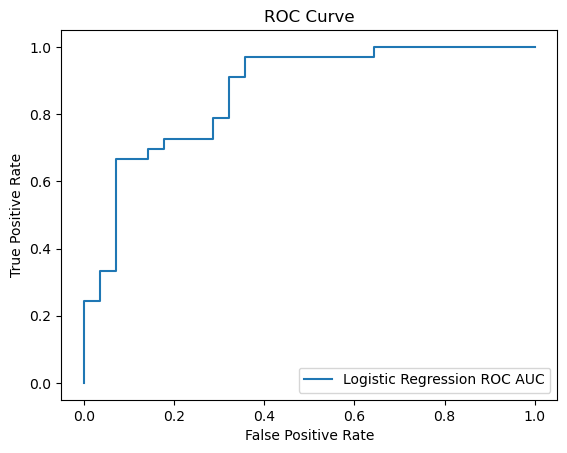

Decision Tree Accuracy: 0.7049180327868853
Decision Tree Precision: 0.7027027027027027
Decision Tree Recall: 0.7878787878787878
Decision Tree F1: 0.7428571428571429
Decision Tree ROC AUC: 0.6975108225108225


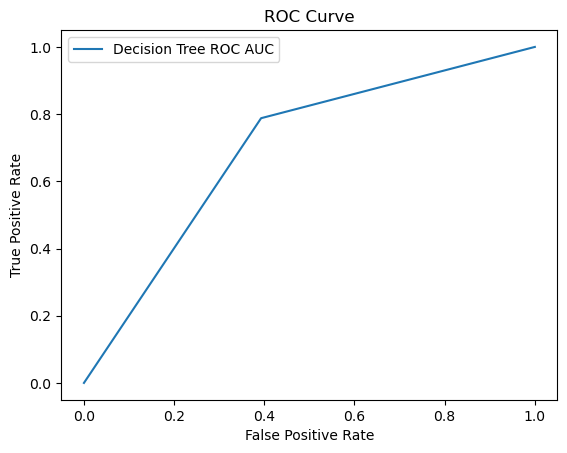

Random Forest Accuracy: 0.8360655737704918
Random Forest Precision: 0.7804878048780488
Random Forest Recall: 0.9696969696969697
Random Forest F1: 0.8648648648648648
Random Forest ROC AUC: 0.8241341991341993


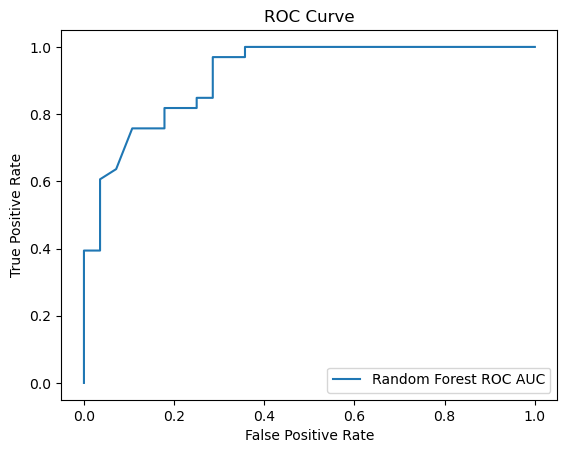

KNN Accuracy: 0.5901639344262295
KNN Precision: 0.625
KNN Recall: 0.6060606060606061
KNN F1: 0.6153846153846154
KNN ROC AUC: 0.5887445887445887


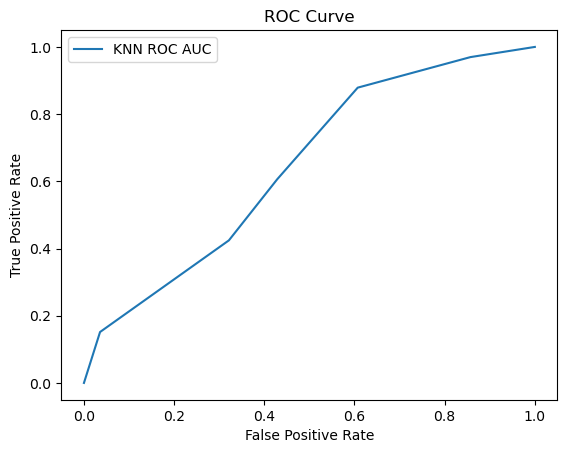

SVM Accuracy: 0.6557377049180327
SVM Precision: 0.65
SVM Recall: 0.7878787878787878
SVM F1: 0.7123287671232875
SVM ROC AUC: 0.6439393939393939


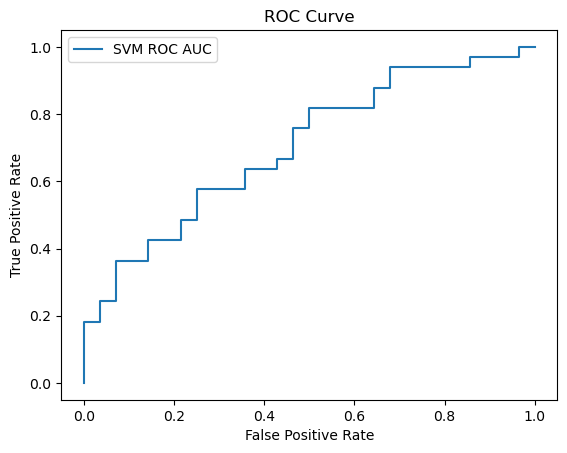

In [8]:
# Classification Accuracy of the Algorithms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42) # to produce same random split of 42.
}

# Evaluate the metrics
metrics = {
    'Accuracy' : accuracy_score,
    'Precision' : precision_score,
    'Recall' : recall_score,
    'F1' : f1_score,
    'ROC AUC' : roc_auc_score
}

# train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
# Calculate metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, y_pred)
        print(f'{model_name} {metric_name}: {metric_value}')
        
        if metric_name == 'ROC AUC':
            fpr, tpr, _= roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f'{model_name} ROC AUC')
            
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title('ROC Curve')
            plt.legend()
            plt.show()
                    
            



# Actionable insight of the models
#things expected to see in models
LR
Best performed model : Logistic Regression 
Precision (0.88), Recall (0.90), F1-score (0.89), ROC AUC (0.91)

Balance model performance: 

#do the same for others 
#KNN

#DT

#RF

Conclusion, eg LR is the best performer model with the highest score metrics

KNeighborsTransformer 

# Recommendation
Models considered for deployment 

Further tuning of the models

Ensemble methods, enhancing performance and robustness

confusion matrix 

